# Introduction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('/content/drive/MyDrive/100DaysOfCodeInPython/Day 74 Google Trends Data Resampling and Visualising Time Series/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('/content/drive/MyDrive/100DaysOfCodeInPython/Day 74 Google Trends Data Resampling and Visualising Time Series/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/content/drive/MyDrive/100DaysOfCodeInPython/Day 74 Google Trends Data Resampling and Visualising Time Series/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('/content/drive/MyDrive/100DaysOfCodeInPython/Day 74 Google Trends Data Resampling and Visualising Time Series/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

##### **Shapes of the dataframes / Number of rows and columns**

In [4]:
print(df_tesla.shape)
df_tesla.head()

(124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


##### **The column names**

In [5]:
print(df_tesla.columns)

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')


The `df_tesla` DataFrame has 124 rows and 3 columns: for the *Month*, the *search popularity* and the closing price of the Tesla stock.

##### **Show the largest/smallest number in the search data column**

In [6]:
max_search = df_tesla['TSLA_WEB_SEARCH'].max()
min_search = df_tesla['TSLA_WEB_SEARCH'].min()
print(f'Largest value for Tesla in Web Search: {max_search}')
print(f'Smallest value for Tesla in Web Search: {min_search}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


##### **The `.describe()` function to see some useful descriptive statistics**

In [7]:
print(df_tesla.describe())

       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007


##### **The periodicity of the time series data (daily, weekly, monthly)**
<ul>
<li>df_tesla - Monthly</li>
</ul>

### Unemployment Data

In [8]:
print(df_unemployment.shape)
print(df_unemployment.columns)
df_unemployment.head()

(181, 3)
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [9]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [10]:
print(df_unemployment.describe())

       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std                 20.484925    1.891859
min                 14.000000    3.700000
25%                 21.000000    4.700000
50%                 26.000000    5.400000
75%                 45.000000    7.800000
max                100.000000   10.000000


##### **The periodicity of the time series data (daily, weekly, monthly)**
<ul>
<li>df_unemployment - Monthly</li>
</ul>

### Bitcoin

In [11]:
print(df_btc_search.shape)
print(df_btc_search.columns)
print(df_btc_price.head())
print()
print(df_btc_price.shape)
print(df_btc_price.columns)
print(df_btc_search.head())

(73, 2)
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0

(2204, 3)
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5


In [12]:
print(df_btc_search.describe())
print(df_btc_price.describe())

       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000
              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10


##### **The periodicity of the time series data (daily, weekly, monthly)**
<ul>
<li>df_btc_search - Monthly</li>
<li>df_btc_price - Daily</li>
</ul>

In [13]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


##### **What does a value of 100 in the Google Trend search popularity actually mean?**

The value is an index ranging from 0-100. The numbers represent the search interest relative to the highest point on the chart for the selected region and time. A value of 100 is the peak popularity of the term, whilst a value of 50 means that the term is half as popular. Scores of 0 mean that a sufficient amount of data was not available for the selected term.

We can see from our DataFrames that Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as: 

> Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.



For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

Here are the Google Trends Search Parameters that I used to generate the .csv data:
<ul>
<li>"Tesla", Worldwide, Web Search</li>
<li>"Bitcoin", Worldwide, News Search</li>
<li>"Unemployment Benefits", United States, Web Search</li>
</ul>

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_10-37-10-b0e4a8a0fd6d583993afbb72388ac731.png">

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [14]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


**Solution: Finding the missing values**

For 3 of the DataFrames there are no missing values. We can verify this using the `.isna()` method. This will return a whole series of booleans, but we can chain `.values.any()` to see if any value in the series is True.

In [15]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [16]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [17]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [18]:
df_list = [df_tesla, df_unemployment, df_btc_price, df_btc_search]

In [19]:
for df in df_list:
  df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])

In [53]:
for df in df_list:
  print(df[df.columns[0]].dtypes)
  print(df.columns)

datetime64[ns]
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
datetime64[ns]
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
datetime64[ns]
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
datetime64[ns]
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

To convert our daily data into monthly data, we're going to use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html">.resample()</a> function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use `'M'`.  If you ever need to resample a time series to a different frequency, you can find a list of different options here (for example `'Y'` for yearly or 'T' for minute).

After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.

In [21]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

If we wanted the average price over the course of the month, we could use something like:

`df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()`

In [22]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [84]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [24]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

Text(0, 0.5, 'Search Trend')

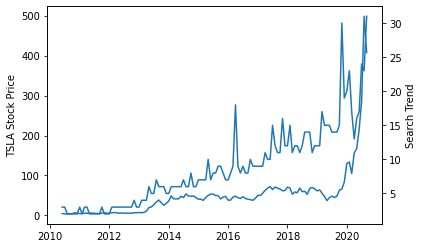

In [25]:
# Get Current Axis
ax1 = plt.gca()
# Create a Twin axix that shares the same x-axis 
ax2 = ax1.twinx()

# Add styling, and by that I mean diffrent colors
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

# Add labels and colors
ax1.set_ylabel("TSLA Stock Price")
ax2.set_ylabel("Search Trend")

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

Text(0, 0.5, 'Search Trend')

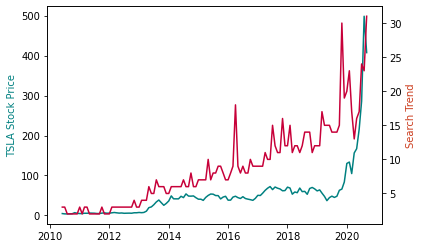

In [26]:
# Get Current Axis
ax1 = plt.gca()
# Create a Twin axix that shares the same x-axis 
ax2 = ax1.twinx()

# Add styling, and by that I mean diffrent colors
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, "teal")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, "#C70039")

# Add labels and colors
ax1.set_ylabel("TSLA Stock Price", color="teal")
ax2.set_ylabel("Search Trend", color="#CC3E1F")

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

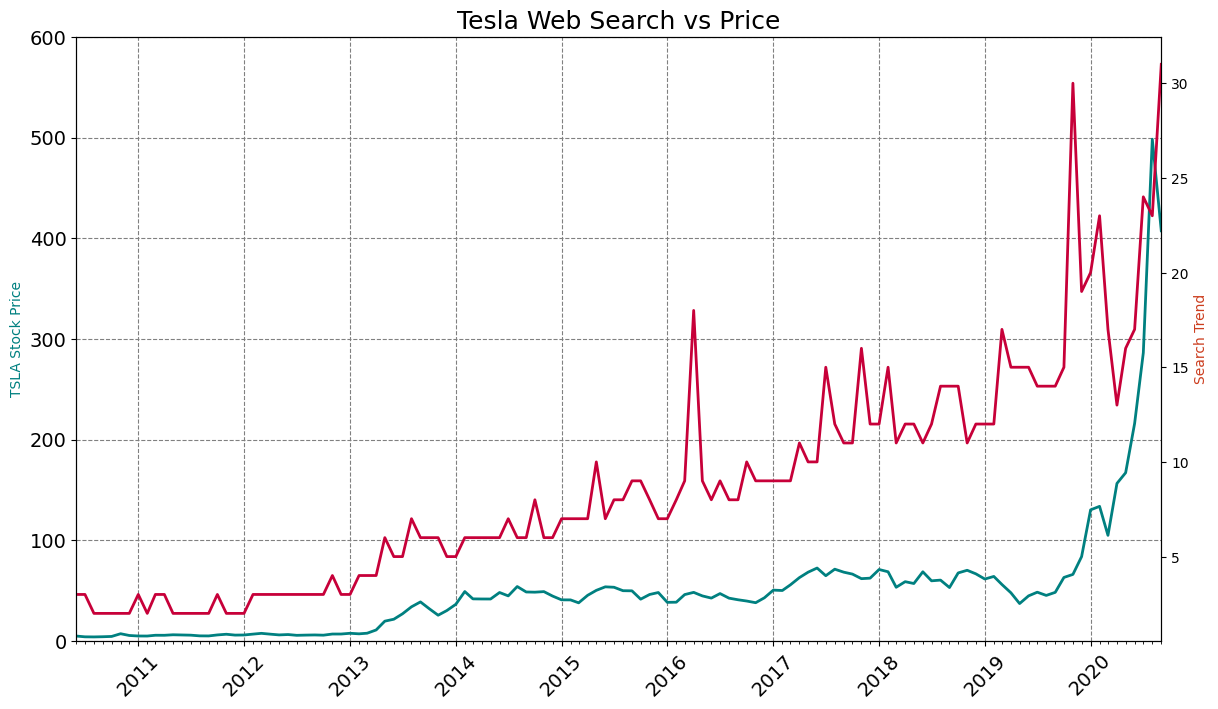

In [87]:
# Increases size and resolution
plt.figure(figsize=(14,8), dpi=100)

# Increase the size and rotate the labels on the x or y axis
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Sets the title and fontsize of the plot
plt.title('Tesla Web Search vs Price', fontsize=18)

# Get Current Axis
ax1 = plt.gca()
# Create a Twin axix that shares the same x-axis 
ax2 = ax1.twinx()

# Add COLOR and LINEWIDTH
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, "teal", linewidth=2)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, "#C70039", linewidth=2)

# Add labels and colors
ax1.set_ylabel("TSLA Stock Price", color="teal")
ax2.set_ylabel("Search Trend", color="#CC3E1F")

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Displays chart explicitly
plt.show()

##### **Notebook Formating & Style Helpers**
```
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
```



How to add tick formatting for dates on the x-axis. 

In [28]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [31]:
print(df_btc_monthly.columns)
df_btc_search.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')


Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

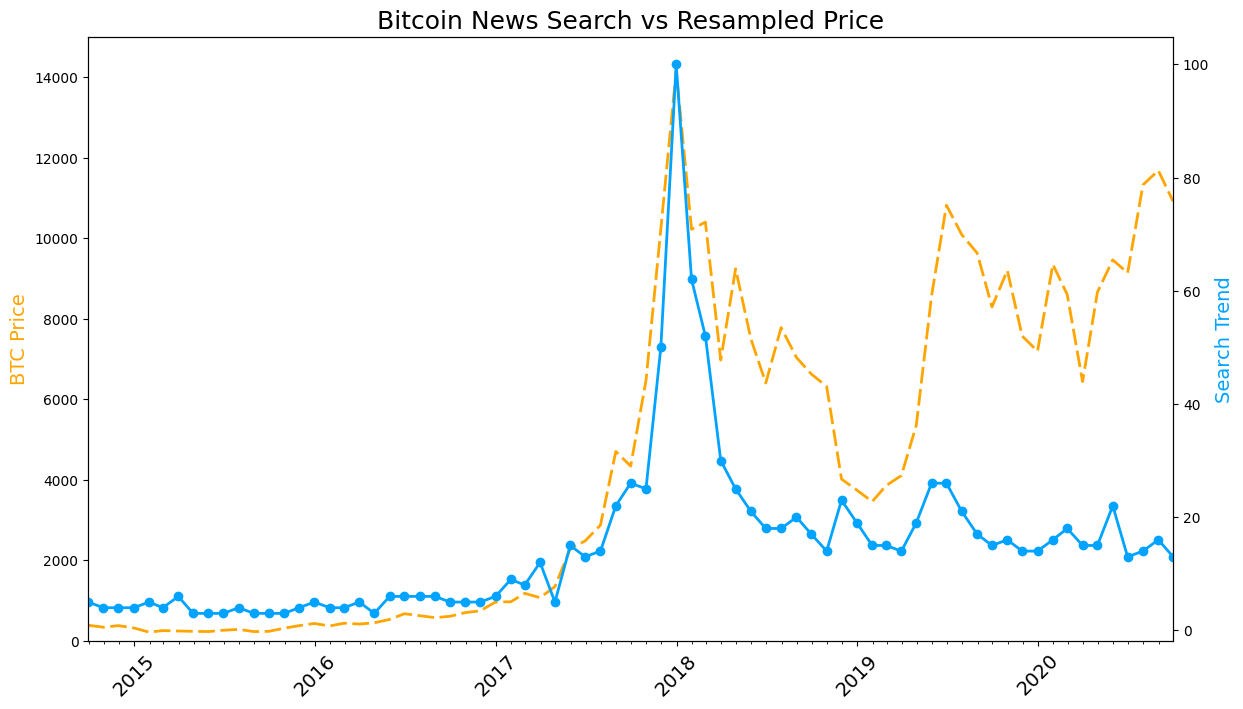

In [83]:
plt.figure(figsize=(14,8), dpi=100)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("BTC Price", color="orange", fontsize=14)
ax2.set_ylabel("Search Trend", color="#00A3FF", fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, "orange", linewidth=2, dashes=[6, 2])
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, "#00A3FF", linewidth=2, marker="o")

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [59]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

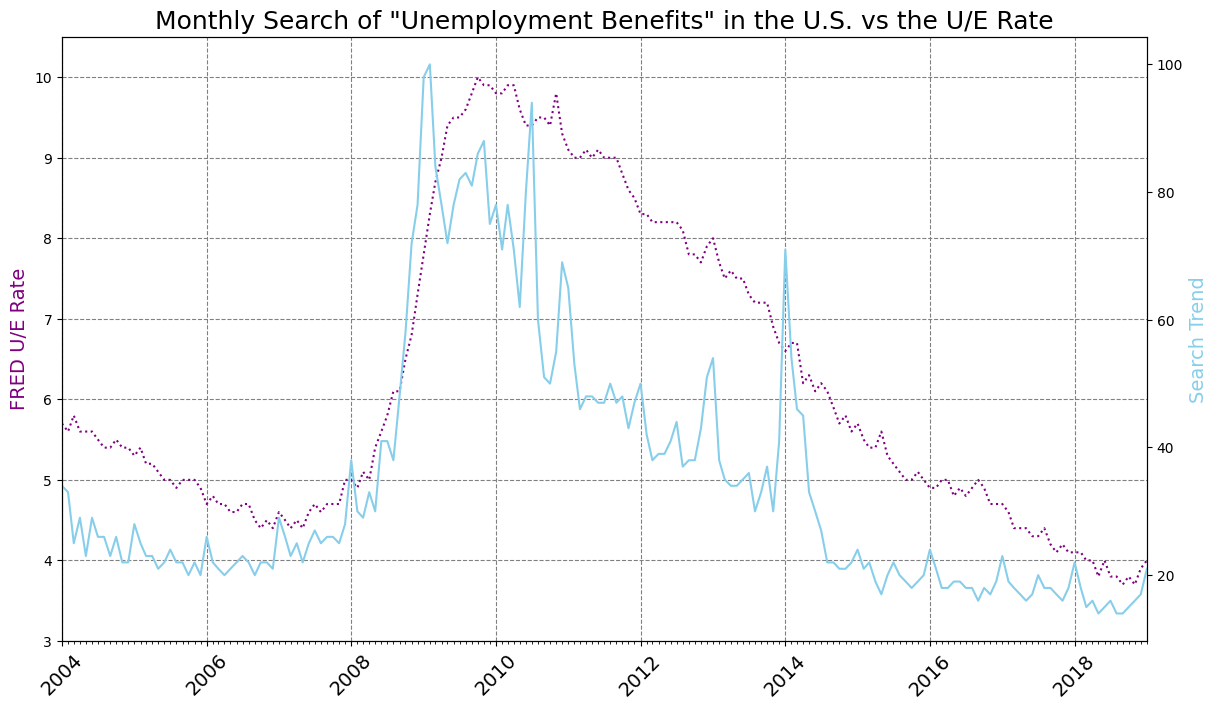

In [95]:
plt.figure(figsize=(14,8), dpi=100)

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("FRED U/E Rate", color="purple", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, "purple", linewidth=1.5, linestyle=":")
# Supported values for linestyle are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, "skyblue", linewidth=1.5)

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [98]:
# Rolling average dataframe for web searches
df_rolling_avg = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

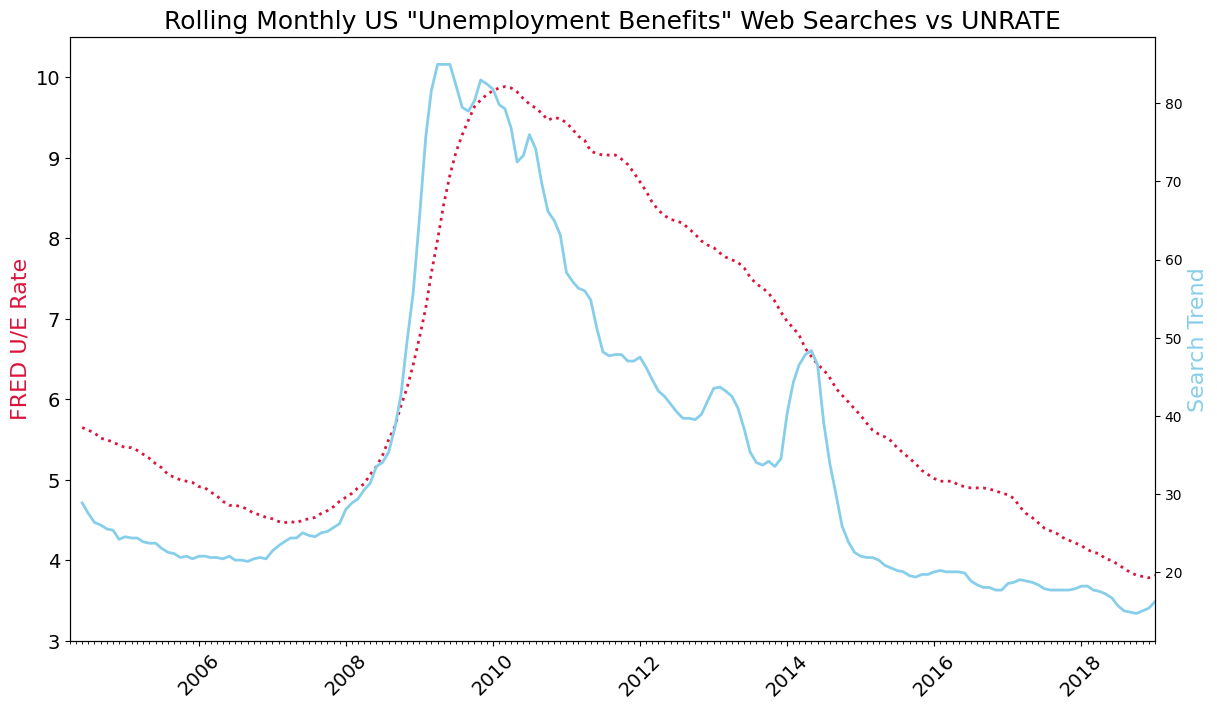

In [113]:
plt.figure(figsize=(14,8), dpi=100)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='crimson', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0]+pd.DateOffset(months=3), df_unemployment.MONTH.max()])
 
# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
 
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'crimson', linewidth=2, linestyle='dotted')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=2)
 
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [117]:
df_ue_2020 = pd.read_csv("/content/drive/MyDrive/100DaysOfCodeInPython/Day 74 Google Trends Data Resampling and Visualising Time Series/UE Benefits Search vs UE Rate 2004-20.csv")

In [119]:
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

In [120]:
df_ue_2020.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

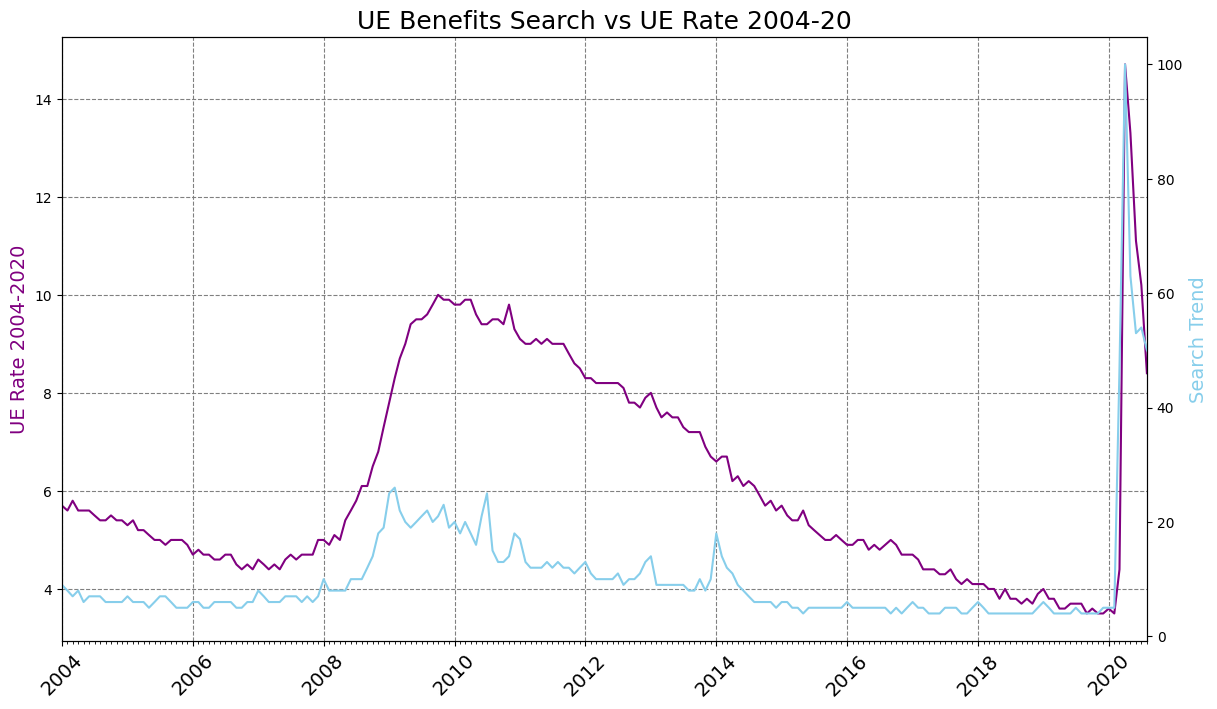

In [122]:
plt.figure(figsize=(14,8), dpi=100)

plt.title('UE Benefits Search vs UE Rate 2004-20', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("UE Rate 2004-2020", color="purple", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, "purple", linewidth=1.5, linestyle="solid")
# Supported values for linestyle are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, "skyblue", linewidth=1.5)

plt.show()

#### **Learning Points & Summary**

In this lesson we looked at how to:
<ul>
<li>How to use <code>.describe()</code> to quickly see some descriptive statistics at a glance.</li>

<li>How to use <code>.resample()</code> to make a time-series data comparable to another by changing the periodicity.</li>

<li>How to work with <code>matplotlib.dates</code> Locators to better style a timeline (e.g., an axis on a chart).</li>

<li>How to find the number of NaN values with <code>.isna().values.sum()</code></li>

<li>How to change the resolution of a chart using the figure's <code>dpi</code></li>

<li>How to create dashed <code>'--'</code> and dotted <code>'-.'</code> lines using <code>linestyles</code></li>

<li>How to use different kinds of markers (e.g., <code>'o'</code> or <code>'^'</code>) on charts.</li>

<li>Fine-tuning the styling of Matplotlib charts by using <code>.set_xlim()</code>, <code>.set_ylabel()</code>, <code>linewidth</code> and <code>color</code> (both in the form of named colours and HEX codes).</li>

<li>Using <code>.grid()</code> to help visually identify seasonality in a time series.</li>
</ul>